<a href="https://colab.research.google.com/github/vamanrathod23-pixel/VR_portfolio/blob/main/seismic_dT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MiniSEED files found:
 - 4212.HHN.04-0700.mseed
 - 4212.HHN.04-0800.mseed
 - 4212_ZNE_04-0700.mseed
 - 4212.HHE.04-0800.mseed
 - 4212_ZNE_04-0700 (1).mseed
 - 4212_ZNE_04-0700 (2).mseed
 - 4212.HHZ.04-0700.mseed
 - 4212.HHZ.04-0800.mseed
 - 4212.HHE.04-0700.mseed

📊 Plotting: 4212.HHN.04-0700.mseed


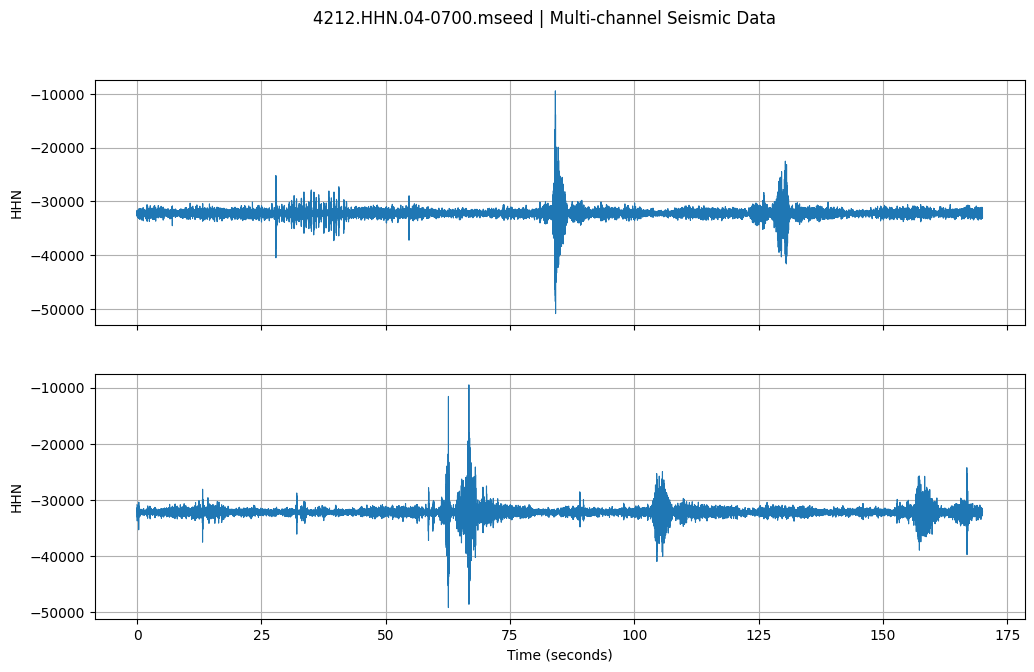


📊 Plotting: 4212.HHN.04-0800.mseed


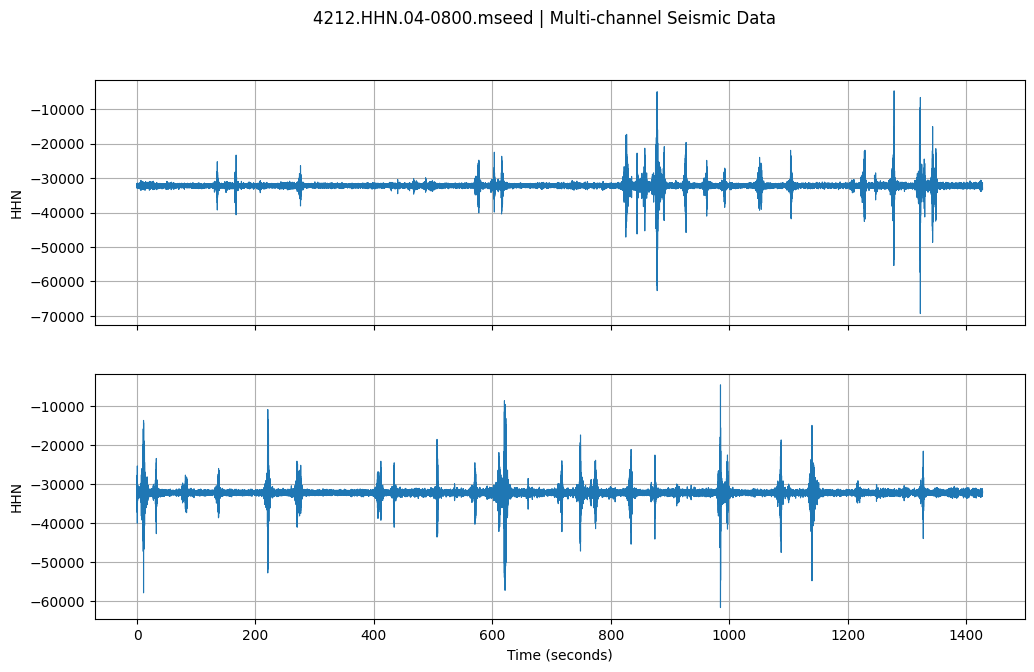


📊 Plotting: 4212_ZNE_04-0700.mseed


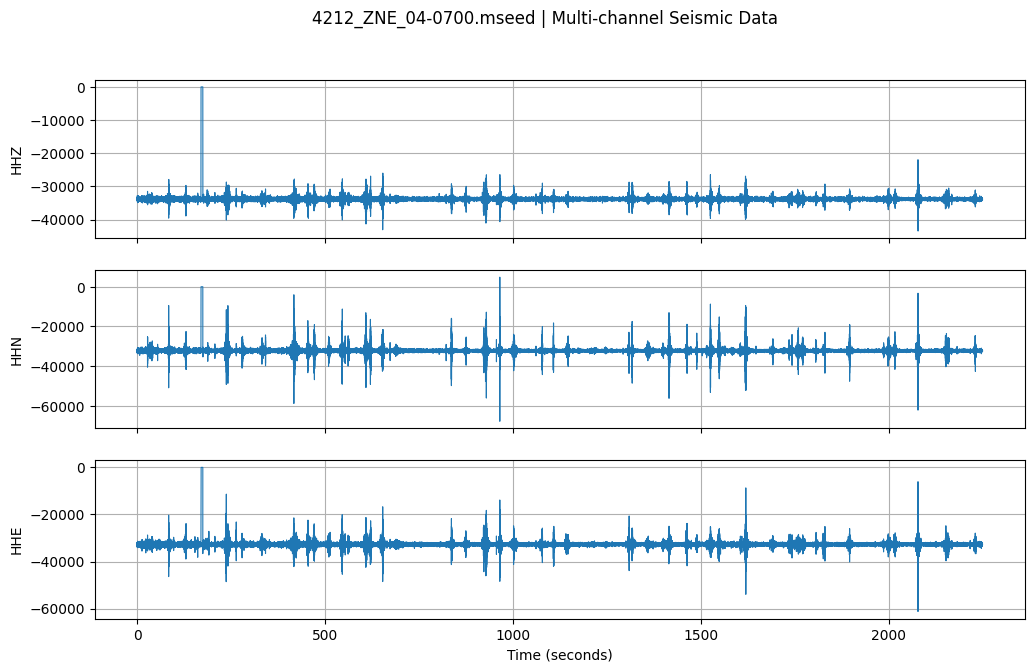


📊 Plotting: 4212.HHE.04-0800.mseed


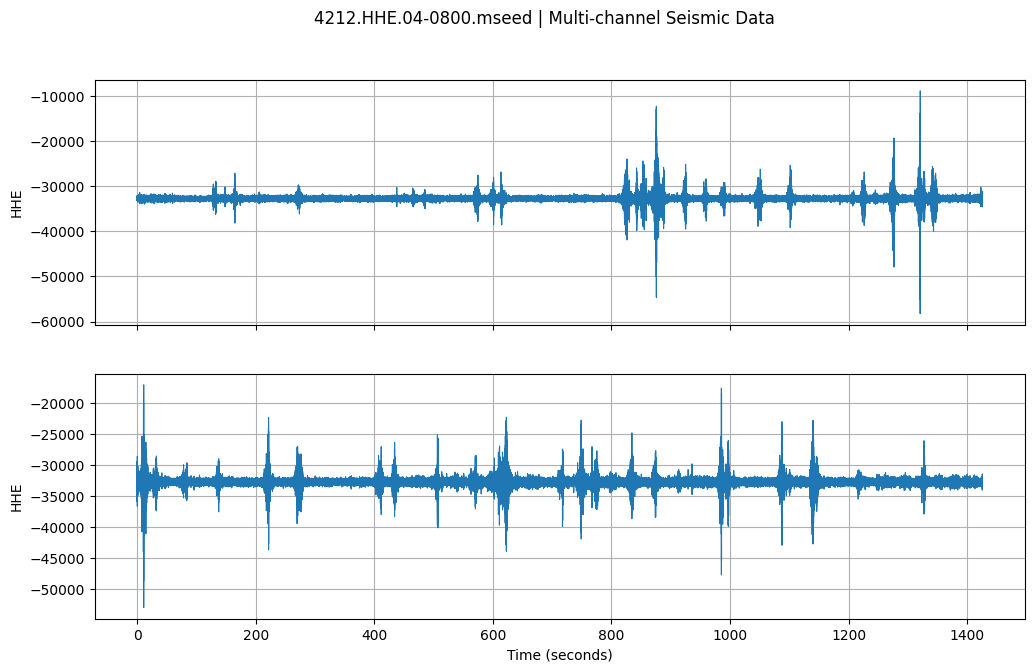


📊 Plotting: 4212_ZNE_04-0700 (1).mseed


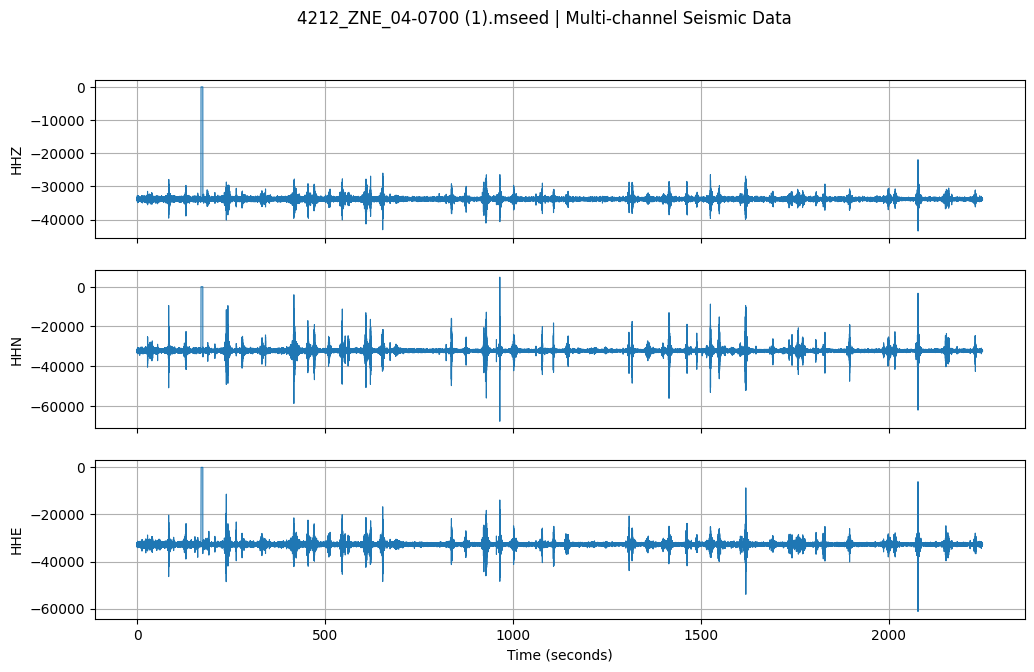


📊 Plotting: 4212_ZNE_04-0700 (2).mseed


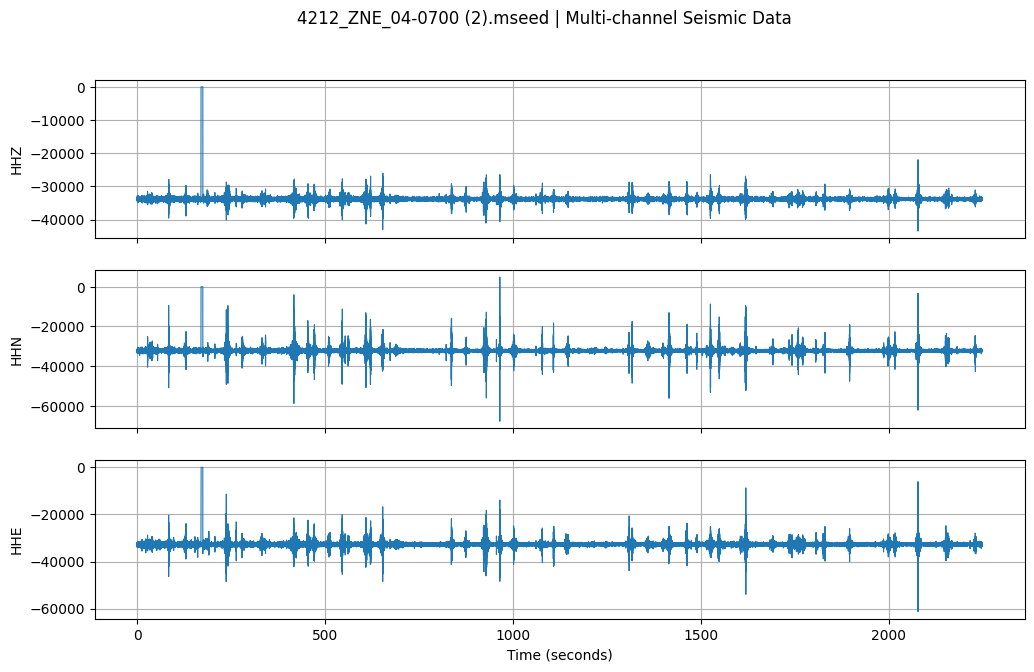


📊 Plotting: 4212.HHZ.04-0700.mseed


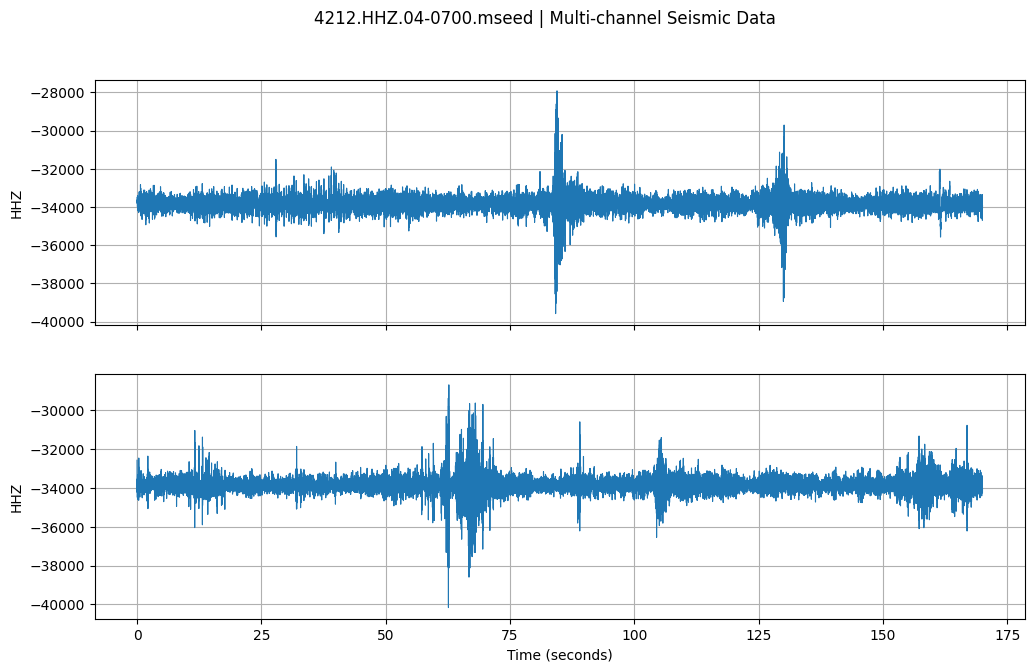


📊 Plotting: 4212.HHZ.04-0800.mseed


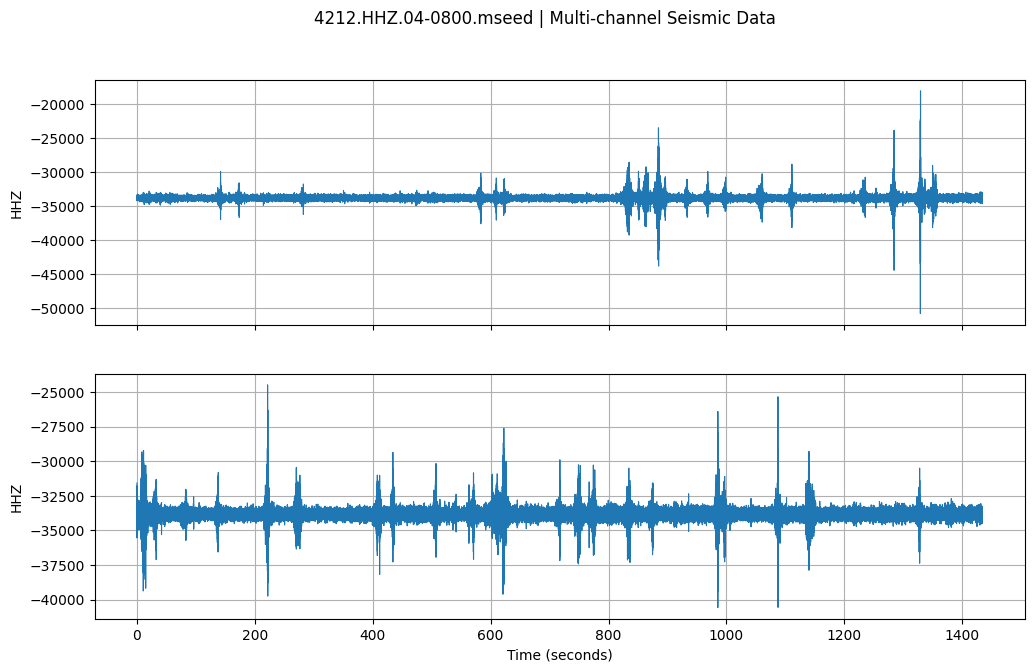


📊 Plotting: 4212.HHE.04-0700.mseed


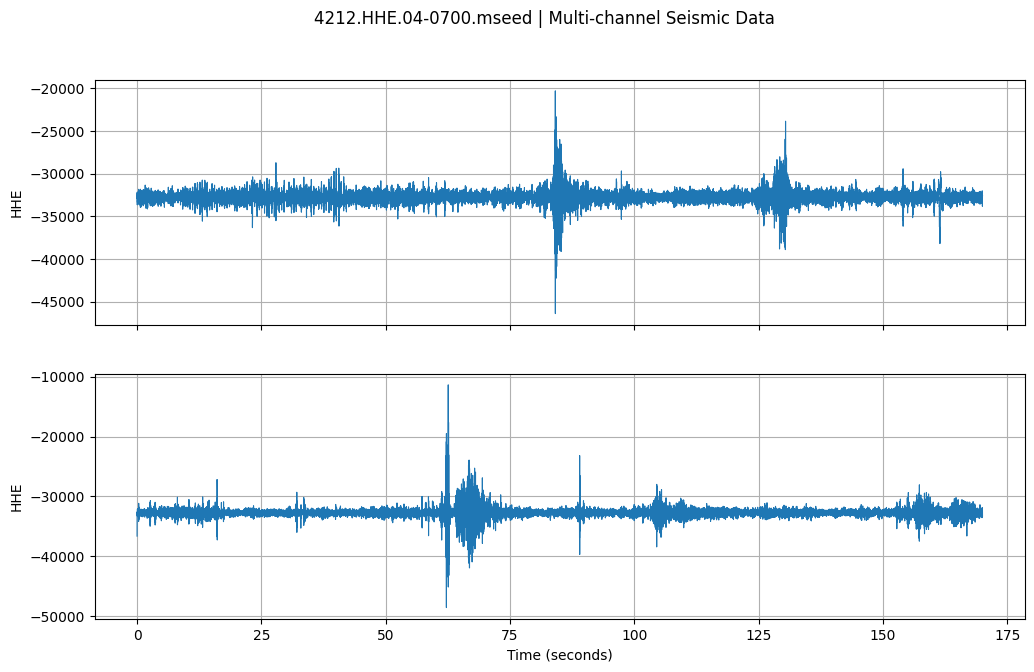

In [8]:
# Find all MiniSEED files
mseed_files = [f for f in os.listdir() if f.endswith(".mseed")]

print("MiniSEED files found:")
for f in mseed_files:
    print(" -", f)

for file in mseed_files:
    st = read(file)

    print(f"\n📊 Plotting: {file}")

    # -------------------------------
    # SINGLE-CHANNEL FILE
    # -------------------------------
    if len(st) == 1:
        tr = st[0]
        t = tr.times()

        plt.figure(figsize=(12,4))
        plt.plot(t, tr.data, linewidth=0.8)
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.title(f"{file} | {tr.stats.station} {tr.stats.channel}")
        plt.grid(True)
        plt.show()

    # -------------------------------
    # MULTI-CHANNEL FILE (Z N E)
    # -------------------------------
    else:
        min_len = min(len(tr.data) for tr in st)

        fig, axs = plt.subplots(len(st), 1, figsize=(12,7), sharex=True)

        for i, tr in enumerate(st):
            t = tr.times()[:min_len]
            axs[i].plot(t, tr.data[:min_len], linewidth=0.8)
            axs[i].set_ylabel(tr.stats.channel)
            axs[i].grid(True)

        axs[-1].set_xlabel("Time (seconds)")
        fig.suptitle(f"{file} | Multi-channel Seismic Data", fontsize=12)
        plt.show()


In [9]:
file = "4212.HHZ.04-0700.mseed"   # FIRST FILE

tr = read(file)[0]

data = tr.data
fs = tr.stats.sampling_rate
t = tr.times()


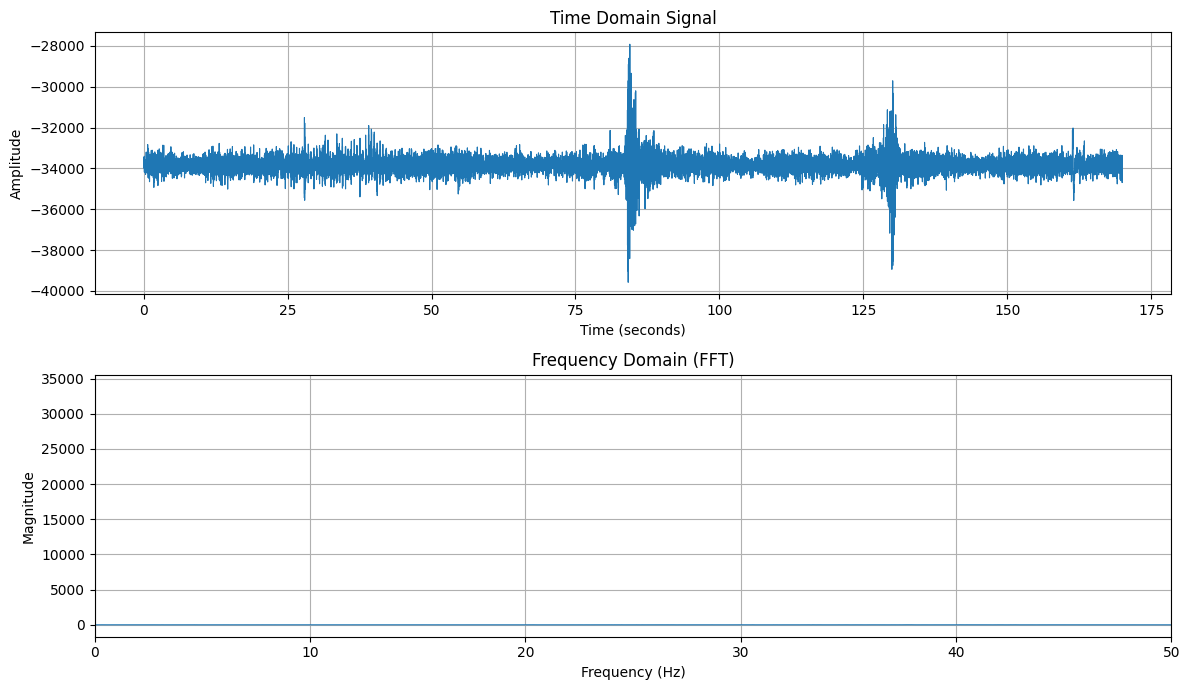

In [11]:
N = len(data)

# FFT
fft_vals = np.fft.fft(data)
fft_mag = np.abs(fft_vals) / N

# Frequency axis
freq = np.fft.fftfreq(N, d=1/fs)

# Use only positive frequencies
pos_idx = freq >= 0
freq = freq[pos_idx]
fft_mag = fft_mag[pos_idx]
plt.figure(figsize=(12,7))

# ---- Time Domain ----
plt.subplot(2,1,1)
plt.plot(t, data, linewidth=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
plt.grid(True)

# ---- Frequency Domain ----
plt.subplot(2,1,2)
plt.plot(freq, fft_mag, linewidth=0.8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain (FFT)")
plt.xlim(0, 50)   # seismic range (adjust if needed)
plt.grid(True)

plt.tight_layout()
plt.show()



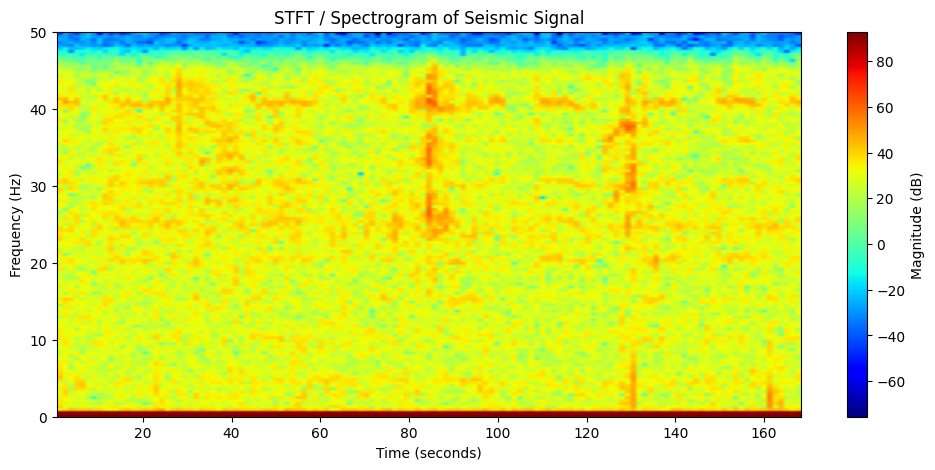

In [12]:
plt.figure(figsize=(12,5))

plt.specgram(
    data,
    NFFT=256,          # window length
    Fs=fs,             # sampling frequency
    noverlap=128,      # overlap
    scale='dB',
    cmap='jet'
)

plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title("STFT / Spectrogram of Seismic Signal")
plt.colorbar(label="Magnitude (dB)")
plt.ylim(0, 50)       # seismic frequency band
plt.show()
